<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from metrics_regression import *
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

Pregunta 1.-

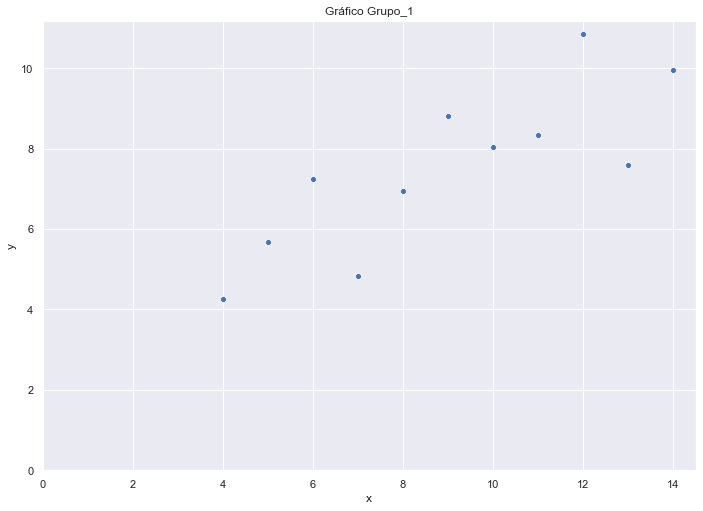

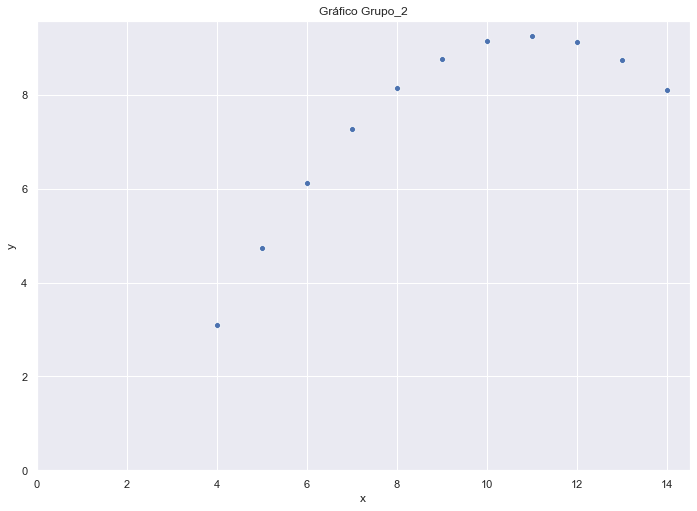

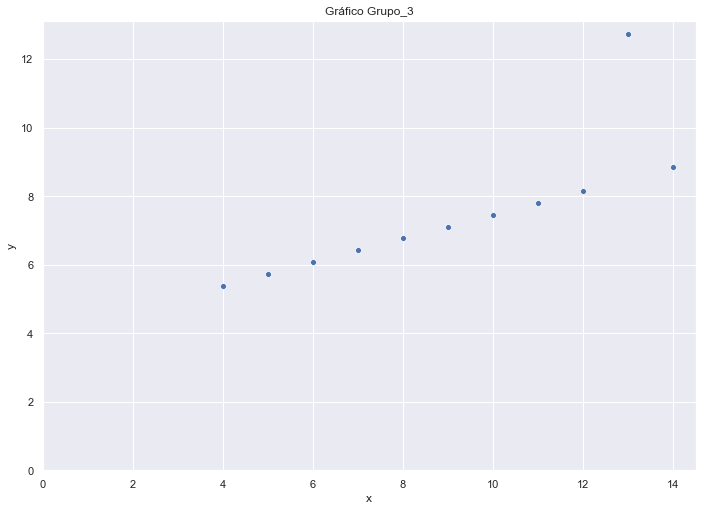

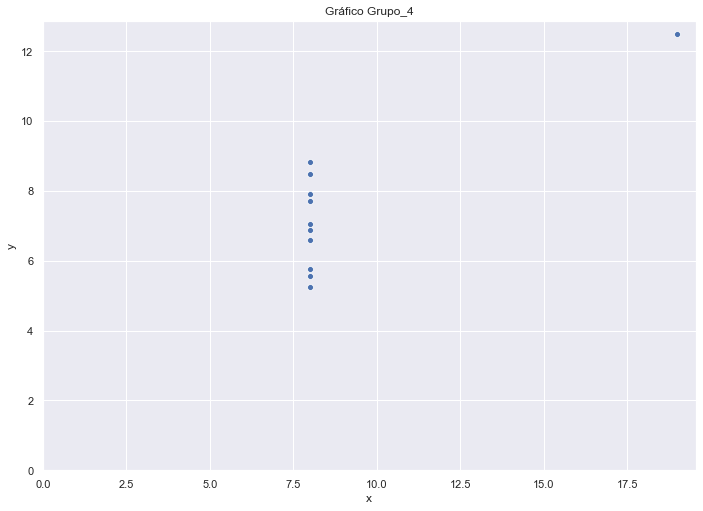

In [4]:
grupos = df.groupby(['grupo'])
for a,b in grupos:
    sns.scatterplot(x ='x',
                y = 'y',
                data = b        
                )
    plt.title('Gráfico {}'.format(a))
    plt.ylim(0, None)
    plt.xlim(0, None)
    plt.show()

Observando los gráficos se nota claramente que los datos tienen un comportamiento distinto.

Pregunta 2.-

In [5]:
for a,b in grupos:
    print('\n Las estadísticas para {} son: \n {}'.format(a , b.describe()))


 Las estadísticas para Grupo_1 son: 
                x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000

 Las estadísticas para Grupo_2 son: 
                x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000

 Las estadísticas para Grupo_3 son: 
                x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000

 Las estadísticas para Grupo_4 son: 
                x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std 

Los datos poseen estadísticas casi idénticas, por lo que sólo mirando esto se supondría que tienen un comportamiento similar.

Pregunta 3.-

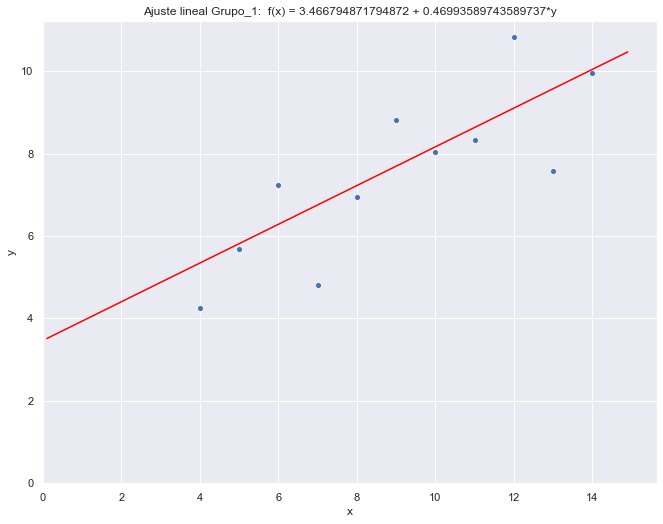

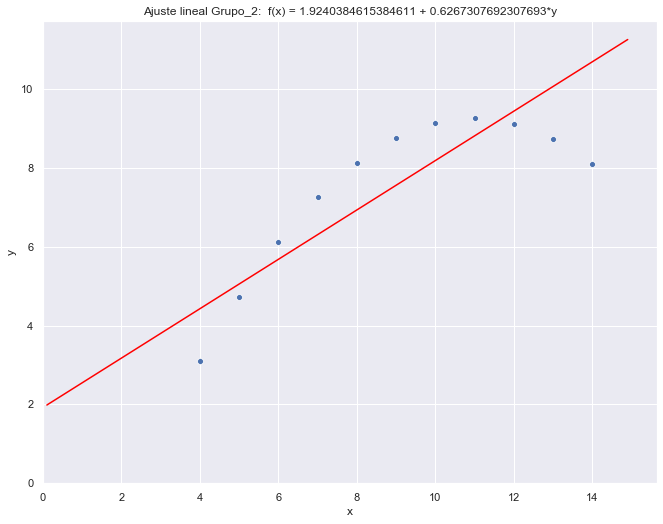

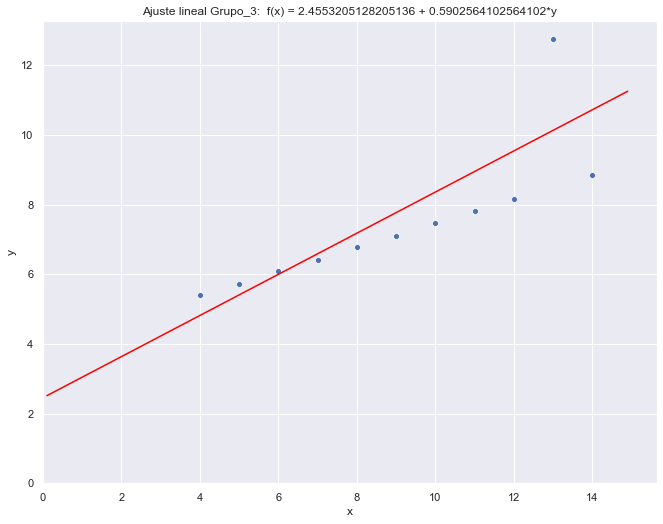

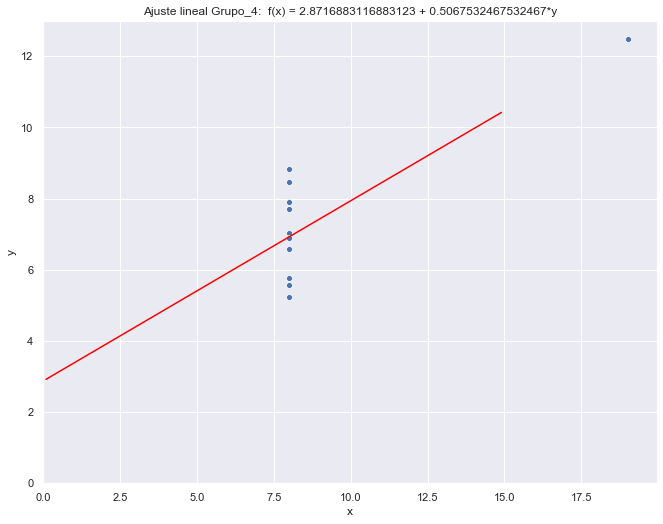

In [6]:
for a,b in grupos:
    X = b[['x']]
    y = b['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model_rl = LinearRegression() 
    model_rl.fit(X_train, y_train)  
    Y_predict = model_rl.predict(X_test)
    beta_0 = model_rl.intercept_
    beta_1 = model_rl.coef_[0]
    
    x_range = np.arange(0.1,15,0.1)

    df_plot = pd.DataFrame({'x':x_range,
                            'y_true':[beta_0 + beta_1*n for n in x_range]})

    df = pd.DataFrame({'x':X['x'],
                               'y_true':y})
    
    fig, ax = plt.subplots(figsize=(11, 8.5))


    sns.scatterplot(x='x', y='y_true', data=df, ax=ax)
    sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Ajuste lineal {}:  f(x) = {} + {}*y'.format(a, beta_0, beta_1))
    plt.ylim(0, None)
    plt.xlim(0, None)
    plt.show()
    

Aquí se puede notar claramente que no todos los datos tienen el mismo comportamiento, ya que hay algunos a los que la regresión lineal parece acercarse más al comportamiento de los datos que para otros.

Pregunta 4.-

In [7]:
for a,b in grupos:
    X = b[['x']]
    y = b['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model_rl = LinearRegression() 
    model_rl.fit(X_train, y_train)  
    Y_predict = model_rl.predict(X)
    df_temp = pd.DataFrame(
        {
            'y':y,
            'yhat': Y_predict
            }
    )

    df_metrics = summary_metrics(df_temp)
    df_metrics['r2'] =  round(r2_score(y, Y_predict),4)
    print('\nMetricas para {}:\n {} \n'.format(a, df_metrics))
    


Metricas para Grupo_1:
       mae     mse    rmse   mape   maape   wmape   mmape   smape     r2
0  0.8865  1.2984  1.1395  0.133  0.1299  0.1182  0.1143  0.1242  0.654 


Metricas para Grupo_2:
       mae     mse    rmse    mape   maape   wmape   mmape  smape      r2
0  1.0078  1.4171  1.1904  0.1495  0.1459  0.1344  0.1275  0.141  0.6224 


Metricas para Grupo_3:
       mae     mse   rmse    mape  maape   wmape   mmape   smape      r2
0  0.9206  1.4041  1.185  0.1099  0.109  0.1228  0.0976  0.1076  0.6253 


Metricas para Grupo_4:
       mae     mse  rmse    mape   maape   wmape   mmape   smape      r2
0  0.9027  1.2545  1.12  0.1333  0.1311  0.1203  0.1156  0.1304  0.6653 



Las métricas para los distintos grupos tambien son similares.

Pregunta 5.-

Para el Grupo $1$ la regresión lineal da una buana aproximación para el comportamiento de los datos. \
Para el Grupo $2$ por la forma del gráfico se sugiere realizar una regresión polinómica como sigue.

Para los Grupos $3$ y  $4$ por la forma de los gráficos obtenidos se eliminarán los datos outliers.

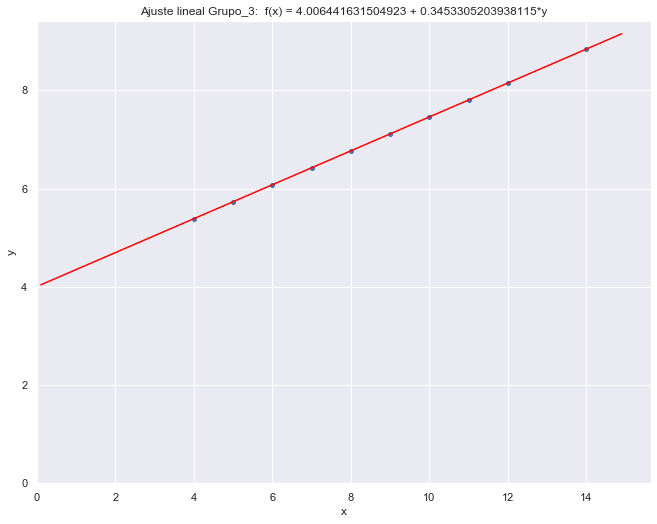

In [60]:
for a,b in grupos:
    b = b[b['y']<12]
    if a == 'Grupo_3' :
        X = b[['x']]
        y = b['y']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model_rl = LinearRegression() 
        model_rl.fit(X_train, y_train)  
        Y_predict = model_rl.predict(X_test)
        beta_0 = model_rl.intercept_
        beta_1 = model_rl.coef_[0]

        x_range = np.arange(0.1,15,0.1)

        df_plot = pd.DataFrame({'x':x_range,
                                'y_true':[beta_0 + beta_1*n for n in x_range]})

        df = pd.DataFrame({'x':X['x'],
                                   'y_true':y})

        fig, ax = plt.subplots(figsize=(11, 8.5))


        sns.scatterplot(x='x', y='y_true', data=df, ax=ax)
        sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Ajuste lineal {}:  f(x) = {} + {}*y'.format(a, beta_0, beta_1))
        plt.ylim(0, None)
        plt.xlim(0, None)
        plt.show()
        
    